https://www.youtube.com/watch?v=sM2C-SsREgM
tilføj data generators,
confusion matrix + dokumentation og diskussionsspgs.

# OLA 4
<img src="./images/cnnimages/catordog.gif" alt="Showcasing objective" title="CatorDog" width="600" />

The project work involves solving the following tasks:
1. Obtaining, importing, and pre-processing of data, appropriate for supervised machine learning - classification of images. We use the data from the following [link](https://github.com/datsoftlyngby/soft2024spring-ai/tree/main/Data/CNN).
2. Building and training a model of convolutional neural network (CNN) for recognition of patterns and classification of images based on these patterns.
3. Validating and testing the model with both labelled and not labelled images.
4. Assessing the quality of the model by means of proper measures and criteria.
5. Discussing the process and the product of the project by answering the questions:
- Based on your experience, how would you define ANN and CNN?
- Which hyper-parameters of the CNN architecture have you fine-tuned?
- Which is the role of the activation functions in ANN? Which of them you have implemented?Illustrate them.
- Can you see any advantages and disadvantages of ANN and CNN used for classification in
comparison to the other classification algorithms you are familiar with? Give some examples.

## Part 1 - Data Description
Two folders in ./data/dogvscat/dataset containing training and test images of dogs and cats each separated in their own folders **cats** and **dogs**.
Training folder has 8000 images in total. We would like our model to predict on new image input whether we have a dog or a cat. A dog will have a value closer to 1 and a cat will have a value closer to 0. 

## Part 2 - Installing & loading the libraries we need

In [1]:
import os
os.getcwd()

import sys
sys.version

!python3 -V

#!pip3 install tensorflow --break-system-packages

Python 3.11.5


In [2]:
import glob
from PIL import Image
import cv2
import tensorflow as tf
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [3]:
# TF Version
tf.__version__

'2.16.1'

## Part 3 - Loading the data

In [4]:
train_dir = './data/train'
test_dir = './data/test'

train_list = glob.glob(os.path.join(train_dir,'*.jpg'))
test_list = glob.glob(os.path.join(test_dir, '*.jpg'))

print(f"Train Data: {len(train_list)}")
print(f"Test Data: {len(test_list)}")

Train Data: 0
Test Data: 0


We split the path with dashes e.g.: **./data/train/dog.123.png** and take the last element -1 which is **dog.123.png**. Then we split that as well by dots and get the first element which is the label.

In [5]:
labels = [path.split('/')[-1].split('.')[0] for path in train_list] 
labels[0]

IndexError: list index out of range

In [ ]:
data = pd.DataFrame({"filename": train_list, "label": labels})
data.sample(5)

### Plotting some random images

In [6]:
random_idx = np.random.randint(1, len(train_list), size=9)
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for idx, ax in enumerate(axes.ravel()):
    img = Image.open(train_list[idx])
    ax.set_title(labels[idx])
    ax.imshow(img)

ValueError: low >= high

We see that images vary in size and sometimes there are multiple dogs or cats in a specific image.

## Part 4 - Splitting data into Training, Validation and Testing data

In our neural network we can have multiple layers where we can do many operations (transfer functions). We can apply techniques to the images: Convolution, Pooling , Padding to optimize and scale down the images.. 
We have input (numbers in matrix) after doing before mentioned operations in the layer then we (multiply the value x to a weight) + bias. Then we run through an activtion function.
Weights must be static in the end, meaning we iterate (back propagate) untill we end up on something stable. 
Depending on the error rate, we either lower them or higher them in increments (learning rate) - this is where e.g. ADAM comes in:
The Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm used to minimize the loss function during the training of neural networks. One cycle of this is called epocs.

We can chose from different activation functions, we do...

In [7]:
# generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = "./train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (128, 128)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = "./test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (128, 128)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# normalization method
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

In [9]:
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [10]:
# create CNN model with 3 convolutional layers
# first layer with 32 filters, second 64 filter and third 128

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/Users/rasmustaul/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/step - accuracy: 0.5974 - loss: 0.6555 - val_accuracy: 0.7466 - val_loss: 0.5161
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.7500 - loss: 0.5062 - val_accuracy: 0.7880 - val_loss: 0.4514
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.8031 - loss: 0.4236 - val_accuracy: 0.8202 - val_loss: 0.4017
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8417 - loss: 0.3621 - val_accuracy: 0.8126 - val_loss: 0.4231
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8627 - loss: 0.3123 - val_accuracy: 0.8216 - val_loss: 0.4841
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8995 - loss: 0.2395 - val_accuracy: 0.8212 - val_loss: 0.5125
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9291 - loss: 0.1736 - val_accuracy: 0.8108 - val_loss: 0.5943
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9525 - loss: 0

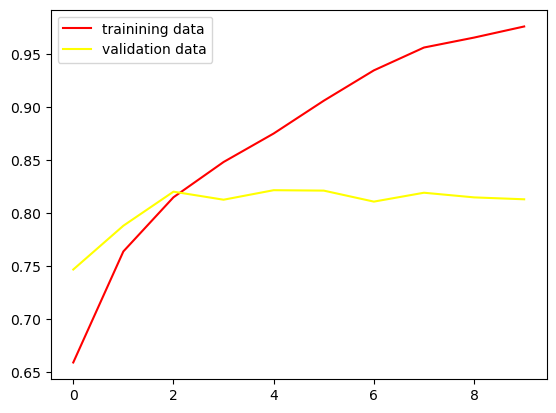

In [14]:
# Validation
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="trainining data")
plt.plot(history.history["val_accuracy"], color="yellow", label="validation data")
plt.legend()
plt.show()

In [ ]:
# Validation
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="trainining data")
plt.plot(history.history["val_accuracy"], color="yellow", label="validation data")
plt.legend()
plt.show()

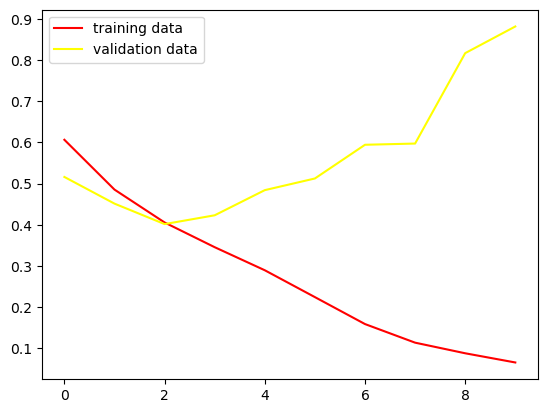

In [15]:
plt.plot(history.history["loss"], color="red", label="training data")
plt.plot(history.history["val_loss"], color="yellow", label="validation data")
plt.legend()
plt.show()

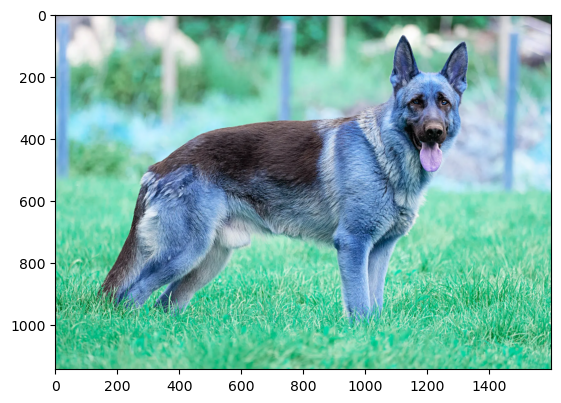

In [16]:
# testing on a random dog found on google
test_img = cv2.imread("randomdog.png")
plt.imshow(test_img)

In [17]:
test_img.shape

(1144, 1600, 3)

In [18]:
test_img = cv2.resize(test_img, (128, 128))

In [19]:
test_input = test_img.reshape((1, 128, 128, 3))

In [20]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[1.]], dtype=float32)

We see that for the dog image it correctly predicts it to be a dog.

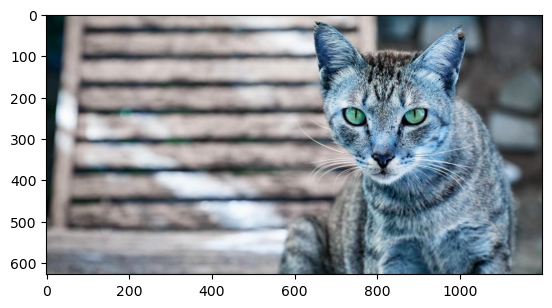

In [21]:
# testing on a random cat found on google
test_img2 = cv2.imread("randomcat.png")
plt.imshow(test_img2)

In [22]:
test_img2.shape

(628, 1200, 3)

In [23]:
test_img2 = cv2.resize(test_img2, (128, 128))

In [24]:
test_input2 = test_img2.reshape((1, 128, 128, 3))

In [25]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.]], dtype=float32)

We see that for the cat image it correctly predicts it to be a cat with a value close to 0.

In [ ]:
# Assessing the quality of the model
# confusion matrix

# Discussion
- **Based on your experience, how would you define ANN and CNN?**

both cnn and ann models are both nural networks. the diffrence lies in the usecase wich they are implemented.
cnn are used for data in grid formats like matrices, this is commenly found in images.
- **Which hyper-parameters of the CNN architecture have you fine-tuned?**
- **Which is the role of the activation functions in ANN? Which of them you have implemented? Illustrate them.**
- **Can you see any advantages and disadvantages of ANN and CNN used for classification in
comparison to the other classification algorithms you are familiar with? Give some examples.**